# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


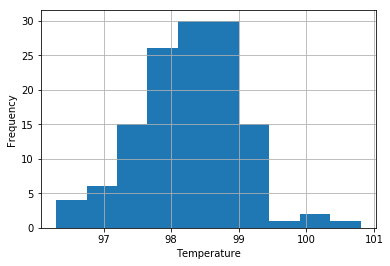

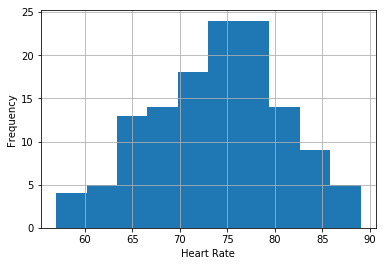

In [13]:
import matplotlib.pyplot as plt

df['temperature'].hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
df['heart_rate'].hist()
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [4]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

In [5]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

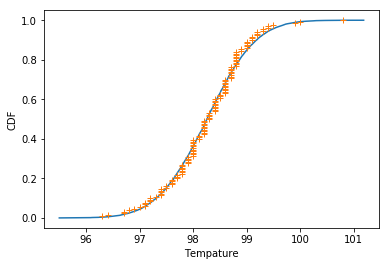

In [6]:
import numpy as np

def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

mean = np.mean(df.temperature)
std  = np.std(df.temperature)
normal = np.random.normal(mean, std, 10000)
x, y = cdf(df.temperature)
x_norm, y_norm = cdf(normal)
plt.plot(x_norm, y_norm)
plt.plot(x, y, marker='+', ls='none')
plt.xlabel('Tempature')
plt.ylabel('CDF')
plt.show()

You need at least 30 before you can reasonably expect an analysis based upon the normal distribution to be valid. Hence, the amount of 130 is reasonably large. Considering all the data given is of seperate people, then the sample data is Independant aswell.

In [7]:
bs_replicates = np.empty(1000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(df.temperature, len(df.temperature))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('mean: {:0.5}'.format(np.mean(bs_replicates)))

mean: 98.247


The null hypothesis should be rejected. The mean body temperature of the sample set is 98.25°.

The mean of a single sample to a population with an hypothesised mean, a one-sample t-test is appropriate.

In [8]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [9]:
popmean=98.6
samp_mean=df.temperature.mean()
samp_std=df.temperature.std()
n=len(df.temperature)
statistic=(samp_mean-popmean)/(samp_std)
print("statistic: "+str(statistic))
pvalue=stats.norm.sf(abs(statistic))*2
print('pvalue: '+str(pvalue))

statistic: -0.4784196512470687
pvalue: 0.6323515496610859


We can't use Z-statistic for this as there is missing information. As the null hypothesis can't be rejected and the population is not equal to 98.6°.

In [10]:
sample_temperature=np.random.choice(a=df.temperature, size=10)
samp_mean10=sample_temperature.mean()
samp_std10=sample_temperature.std()
n10=len(sample_temperature)
statistic10=(samp_mean10-popmean)/(samp_std10)
pvalue10=stats.norm.sf(abs(statistic10))*2
print("Ztest_1sampResult(statistic="+str(statistic10)+', pvalue='+str(pvalue10)+')')
sample_ttest=stats.ttest_1samp(sample_temperature, 98.6)
print(sample_ttest)

Ztest_1sampResult(statistic=-0.7660642662948678, pvalue=0.4436380637431765)
Ttest_1sampResult(statistic=-2.2981927988846036, pvalue=0.04713857327442997)


Since both the z-test, and the t-test have a p-value greater than 0.05, the null hypothesis cannot be rejected on basis of these tests. As the sample size of 10 is very small, we can not get accurate results from the data.

In [11]:
#The sample mean and standard deviation with bootstrap and frequentist approaches
x_bar = np.mean(df.temperature)
s = np.std(df.temperature)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(x_bar, s))

bootstrap_replicates = np.empty(100000)
size = len(bootstrap_replicates)
for i in range(size):
    bootstrap_sample = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)
p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: {}'.format(p))
x_bar = np.mean(bootstrap_replicates)

ci = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - x_bar)))
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low_f, ci_high_f))
print('margin of error: +/-{:0.5}'.format((ci_high_f - x_bar))) 

sample mean: 98.25
sample standard deviation: 0.7304

p-value: 0.0
95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315


95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315


According to both the Bootstrap and Frequentist approaches, using the mean we calculated (98.25°), and at a 95% confidence interval, a temperature below 96.818° or above 99.681° would be considered abnormal.

Of the 130 participants, 65 are female and 65 are male.


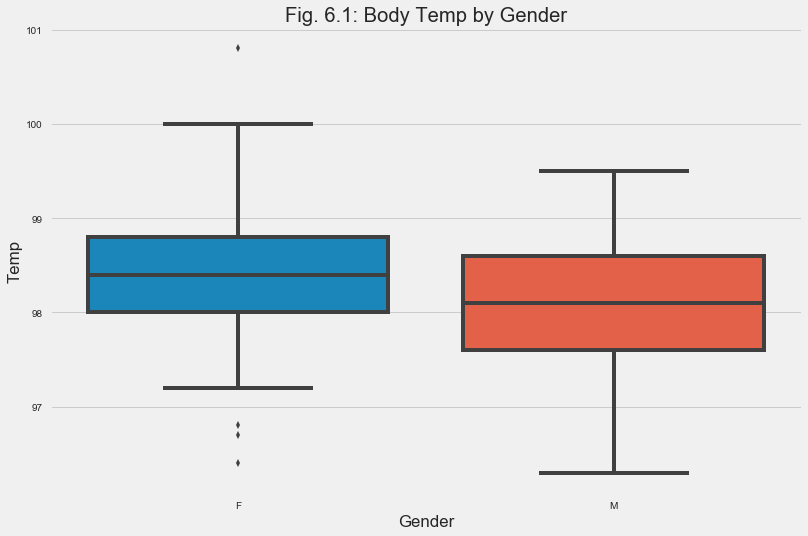

In [24]:
import seaborn as sns
males = df[df.gender == 'M']
females = df[df.gender == 'F']
print('Of the {} participants, {} are female and {} are male.'.format(len(males + females), len(females), len(males)))
sns.boxplot(x = 'gender', y = 'temperature', data=df)
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
plt.xlabel('Gender')
plt.ylabel('Temp')
plt.title('Fig. 6.1: Body Temp by Gender')
plt.show();

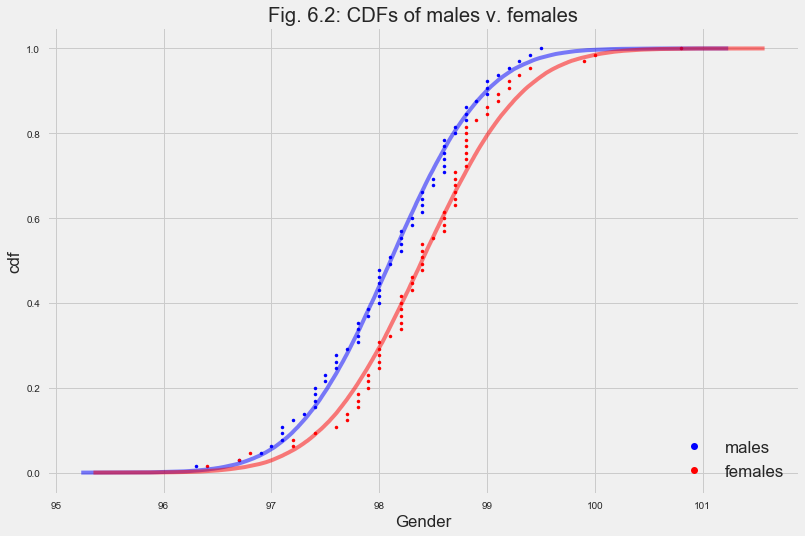

In [25]:
# are both samples normally distributed?
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Compute the cdfs for males and females
x_male, y_male = cdf(males.temperature)
x_female, y_female = cdf(females.temperature)

# Generate plot
plt.plot(x_male, y_male, marker = '.', linestyle = 'none', color='b')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='r')

# draw 100,000 random samples from a normal distribution
m_norm_dist = np.random.normal(np.mean(males.temperature), np.std(males.temperature), 100000)
mnd_x, mnd_y = cdf(m_norm_dist)
plt.plot(mnd_x, mnd_y, color='b', alpha=0.5)

# draw 100,000 random samples from a normal distribution
f_norm_dist = np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000)
fnd_x, fnd_y = cdf(f_norm_dist)
plt.plot(fnd_x, fnd_y, color='r', alpha=0.5)

# Make the margins nice
plt.margins = 0.02

# Label the axes
plt.xlabel('Gender')
plt.ylabel('cdf')
plt.title('Fig. 6.2: CDFs of males v. females')
plt.legend(('males', 'females'), loc='lower right', fontsize='large', markerscale=2)
plt.show();

In [26]:
# common variables
temp_m = males.temperature
temp_f = females.temperature

# Check for identical variances
mv = np.var(temp_m)
fv = np.var(temp_f)
print('Male variance: {}\nFemale variance: {}'.format(mv, fv))

Male variance: 0.4807479289940825
Female variance: 0.5442698224852062


In [19]:
# confirm that variances are not equal with bootstrap - null hypothesis is that they are equal

size = 10000

bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.var(bs_sample_m)
    
bs_var_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.var(bs_sample_f)

bs_var_f = np.sum(bs_replicates_f)/size

bs_var_m
bs_var_f
print('Bootstrap verification:\nMale variance: {}\nFemale variance: {}'.format(bs_var_m, bs_var_f))

Bootstrap verification:
Male variance: 0.4723637235502958
Female variance: 0.5346839640236678


In [20]:
# Variances are not identical, so set `equal_var` to false to perform Welch's t-test
r = stats.ttest_ind(temp_m, temp_f, equal_var=False)
print('t-statistic: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-statistic: -2.285
p-value: 0.02394


In [21]:
# males
print('MALES')
xbar_m = np.mean(temp_m)
s_m = np.std(temp_m)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_m, 3), round(s_m, 3)))

# confidence interval for one draw
ci_low_m, ci_high_m = stats.norm.interval(0.95, loc=xbar_m, scale=s_m)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_m, 3), round(ci_high_m, 3)))

# females
print('\n\nFEMALES')
xbar_f = np.mean(temp_f)
s_f = np.std(temp_f)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_f, 3), round(s_f, 3)))

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=xbar_f, scale=s_f)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_f, 3), round(ci_high_f, 3)))


MALES
sample mean: 98.105
sample standard deviation: 0.693

95% confidence interval (one draw): 96.746 - 99.464


FEMALES
sample mean: 98.394
sample standard deviation: 0.738

95% confidence interval (one draw): 96.948 - 99.84


In [22]:
# bootstrap - two-sided Welch's t-test  
size = 10000
bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.mean(bs_sample_m)
    
bs_mean_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.mean(bs_sample_f)

bs_mean_f = np.sum(bs_replicates_f)/size


result = stats.ttest_ind(bs_replicates_f, bs_replicates_m, equal_var=False)

print('Welch\'s t-test:\nt-statistic: {:0.5}\np-value: {:0.5}'.format(result[0], result[1]))

Welch's t-test:
t-statistic: 228.08
p-value: 0.0


After plotting the data and checking the mean, median, and st.dev. of both males and females, it seems females are just a tad bit higher on average, with a slightly larger range as well. Overall, I would say that the data suggests that females experience slightly higher body temperatures, and even faster heart rates.